# Project for Statistical Learning course

In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

import seaborn as sns

### Read the data as a data frame

In [3]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Shape of Data, datatype, missing value. 

In [4]:
# Shape of data
print(data.shape)

(1338, 7)


In [5]:
#datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
# number of missing values in each of the attributes
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
data.isnull().values.any()

False

In [8]:
print("There are 1338 Observations/Rows and 7 Attributes/Columns.");
print("Dataset has both datatypes  Continuous datatype (age,children, bmi)  and categorical datatype (smoker, sex)")
print("There are no missing values in the dataset")

There are 1338 Observations/Rows and 7 Attributes/Columns.
Dataset has both datatypes  Continuous datatype (age,children, bmi)  and categorical datatype (smoker, sex)
There are no missing values in the dataset


### 5 point summary of numerical attributes

In [9]:
# 5 point summary of numerical attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

bmi: is well distributed, with very small left skewness. few people with lower bmi exists in the dataset.
age: around 20yrs, people have highest contribution. after that the data is more or less uniformly distributed throughout.
charges: very high left skewness in present in dataset, it shows less medical cost incurred by health insurance.


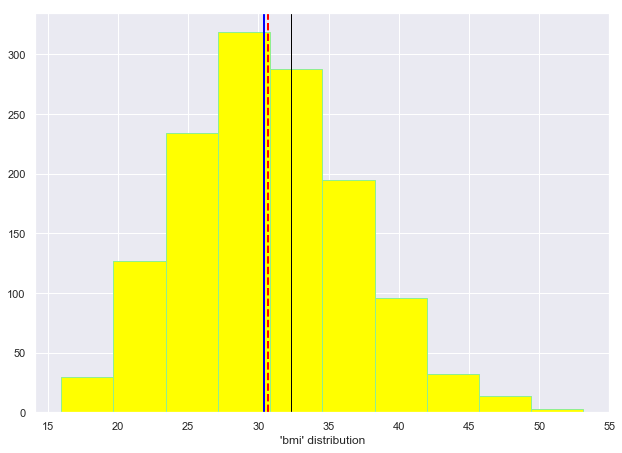

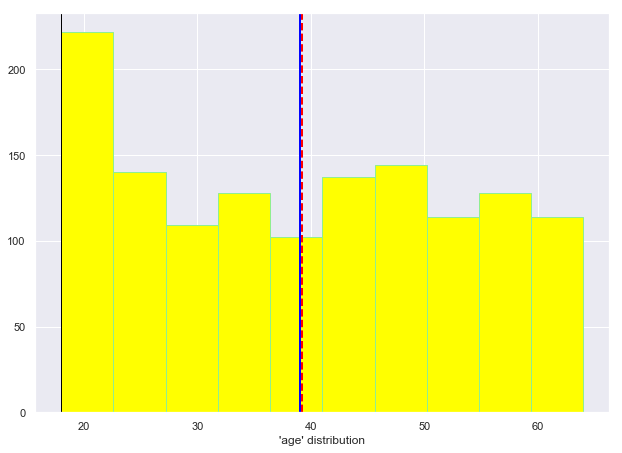

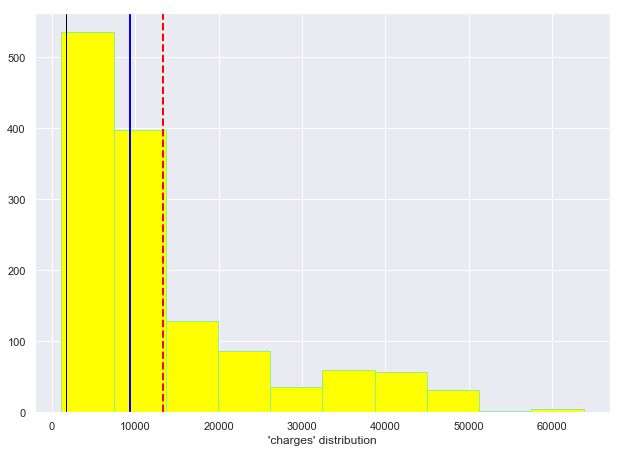

In [111]:
#Distribution of ‘bmi’
plt.figure(figsize=(35,25))
sns.set(style="darkgrid")
plt.subplot(3,3,1)
plt.hist(data["bmi"],color='yellow', edgecolor = 'lightgreen');
plt.axvline(data["bmi"].mean(), color='red', linestyle='dashed',linewidth=2)
plt.axvline(data["bmi"].median(), color='blue', linestyle='solid', linewidth=2)
plt.axvline(data["bmi"].mode()[0], color='black', linestyle='solid', linewidth=1)
plt.xlabel("'bmi' distribution");

#Distribution of ‘age’
plt.figure(figsize=(35,25))
plt.subplot(3,3,2)
plt.hist(data["age"],color='yellow',edgecolor = 'lightgreen');
plt.axvline(data["age"].mean(), color='red', linestyle='dashed',linewidth=2)
plt.axvline(data["age"].median(), color='blue', linestyle='solid', linewidth=2)
plt.axvline(data["age"].mode()[0], color='black', linestyle='solid', linewidth=1)
plt.xlabel("'age' distribution");


#Distribution of ‘charges’
plt.figure(figsize=(35,25)) 
plt.subplot(3,3,3)
plt.hist(data["charges"],color='yellow',edgecolor = 'lightgreen');
plt.axvline(data["charges"].mean(), color='red', linestyle='dashed',linewidth=2)
plt.axvline(data["charges"].median(), color='blue', linestyle='solid', linewidth=2)
plt.axvline(data["charges"].mode()[0], color='black', linestyle='solid', linewidth=1)
plt.xlabel("'charges' distribution");


print("bmi: is well distributed, with very small left skewness. few people with lower bmi exists in the dataset.")

print("age: around 20yrs, people have highest contribution. after that the data is more or less uniformly distributed throughout.")

print("charges: very high left skewness in present in dataset, it shows less medical cost incurred by health insurance.")

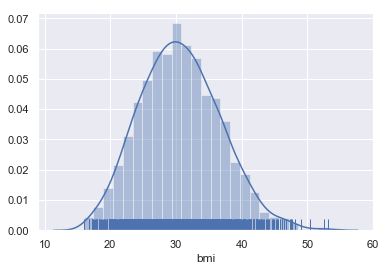

In [11]:
sns.distplot(data['bmi'], kde=True, rug=True);

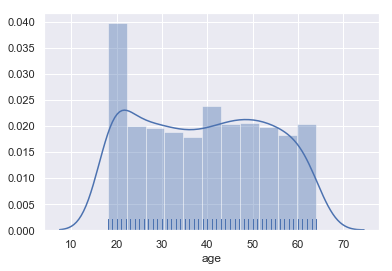

In [12]:
sns.distplot(data['age'], kde=True, rug=True);

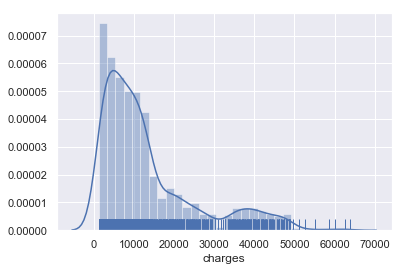

In [13]:
sns.distplot(data['charges'], kde=True, rug=True);

In [14]:
print("bmi: almost Normally distributed")
print("age: shows uniformly distributed")
print("charges: shows highly skewed")

bmi: almost Normally distributed
age: shows uniformly distributed
charges: shows highly skewed


### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [15]:
#EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [16]:
Skewness = pd.DataFrame({'Measure of Skewness' : data.skew()},
                        index=['bmi','age','charges'])
Skewness

,Measure of Skewness
bmi,0.284047
age,0.055673
charges,1.515880


### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

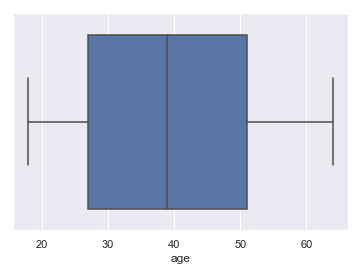

In [18]:
#creating box plot to check outliers
sns.set(style="darkgrid")
sns.boxplot(data["age"]);

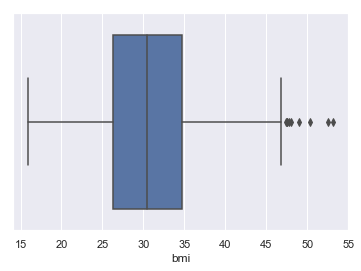

In [19]:
sns.boxplot(data["bmi"]);

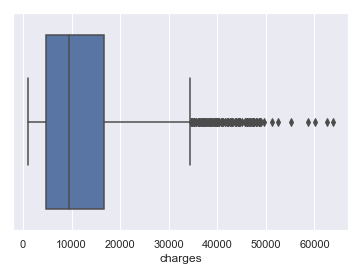

In [20]:
sns.boxplot(data["charges"]);

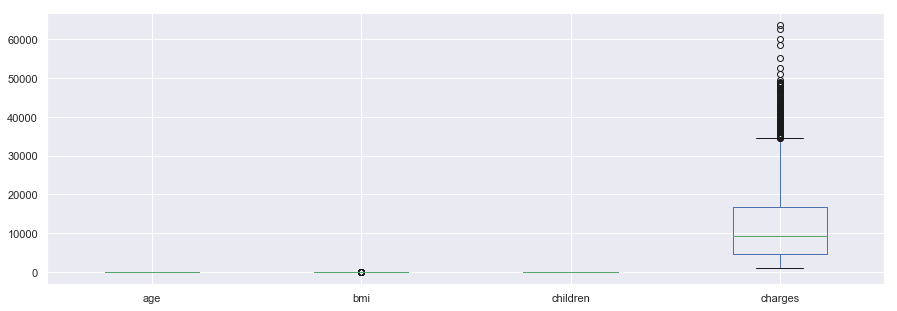

In [21]:
data.boxplot(figsize=(15,5));

In [22]:
print("charges: have very large number of outliers. This can have drastic change in calculations");

charges: have very large number of outliers. This can have drastic change in calculations


In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [24]:
#Calculation of outliers

# charges
Q1_c = data.charges.quantile(0.25)
Q3_c = data.charges.quantile(0.75)
IQR_c = Q3_c - Q1_c
print(IQR_c)


11899.625365


In [25]:
a_c = np.where((data.charges < (Q1_c - 1.5 * IQR_c)) | (data.charges > (Q3_c + 1.5 * IQR_c)));
print('charges outliers with array index id')
a_c

charges outliers with array index id


(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
          82,   84,   86,   94,  109,  123,  146,  158,  161,  175,  185,
         203,  223,  240,  242,  251,  252,  254,  256,  263,  265,  271,
         281,  288,  292,  298,  312,  314,  322,  327,  328,  330,  338,
         373,  377,  381,  420,  421,  422,  441,  476,  488,  500,  524,
         530,  543,  549,  558,  569,  577,  587,  609,  615,  621,  623,
         629,  665,  667,  668,  674,  677,  682,  689,  697,  706,  725,
         736,  738,  739,  742,  759,  803,  819,  826,  828,  842,  845,
         850,  852,  856,  860,  883,  893,  901,  917,  947,  951,  953,
         956,  958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062,
        1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146,
        1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284,
        1288, 1291, 1300, 1301, 1303, 1313, 1323], dtype=int64),)

In [26]:
#bmi outliers
# charges
Q1_b = data.bmi.quantile(0.25)
Q3_b = data.bmi.quantile(0.75)
IQR_b = Q3_b - Q1_b
print(IQR_b)


8.3975


In [27]:
a_b = np.where((data.bmi < (Q1_b - 1.5 * IQR_b)) | (data.bmi > (Q3_b + 1.5 * IQR_b)));
print("bmi outliers with array index id ")
a_b

bmi outliers with array index id 


(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [28]:
# age
#bmi outliers
# charges
Q1_a = data.age.quantile(0.25)
Q3_a = data.age.quantile(0.75)
IQR_a = Q3_a - Q1_a
print(IQR_a)


24.0


In [29]:
a_a = np.where((data.age < (Q1_a - 1.5 * IQR_a)) | (data.age > (Q3_a + 1.5 * IQR_a)));
print("age outliers with array index id ")
a_a

age outliers with array index id 


(array([], dtype=int64),)

In [30]:
print( "bmi has less outliers which infers less people have bmi out the range of average people.")
print( "charges has huge outliers, with extreme values, which indicates rarely people give high charges.")
print( "age has no outlier.")

bmi has less outliers which infers less people have bmi out the range of average people.
charges has huge outliers, with extreme values, which indicates rarely people give high charges.
age has no outlier.


### Distribution of categorical columns (include children)

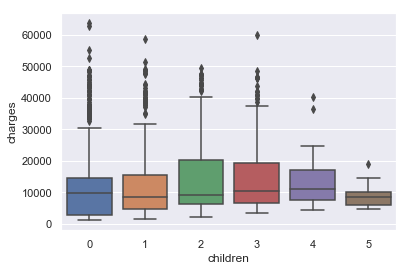

In [32]:
#children
sns.boxplot(x='children', y='charges', data= data);

In [33]:
print(" from above box plot, no child paying higher charges, while people having 5 childersn paid less.");

 from above box plot, no child paying higher charges, while people having 5 childersn paid less.


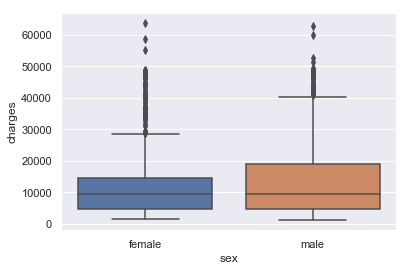

In [34]:
sns.boxplot(x='sex', y='charges', data= data);

In [35]:
print("Both male and female have huge outliers which shows most of them paid extreme charges")
print("Female has more outliers as compared to males. males have a right skew, which shows more of them pay higher charges.")

Both male and female have huge outliers which shows most of them paid extreme charges
Female has more outliers as compared to males. males have a right skew, which shows more of them pay higher charges.


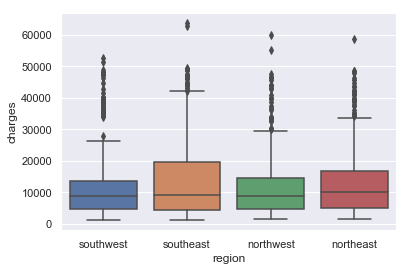

In [36]:
sns.boxplot(x='region', y='charges', data= data);

In [37]:
print("All regions have outliers which shows people with all regions paid extrem charges")

All regions have outliers which shows people with all regions paid extrem charges


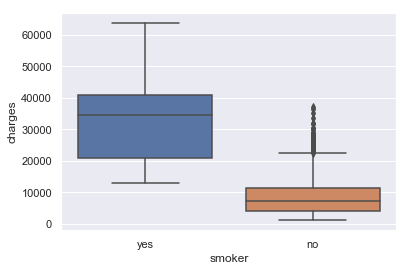

In [38]:
sns.boxplot(x='smoker', y='charges', data= data);

In [39]:
print("Smokers pay high insurance charges compared to non-smokers, Non-Smokers has outliers who paid high charges")

Smokers pay high insurance charges compared to non-smokers, Non-Smokers has outliers who paid high charges


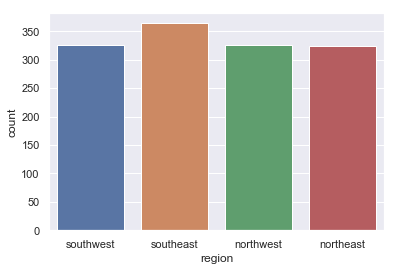

In [40]:
#Univariate

sns.countplot(data['region']);

In [41]:
print("counts are uniform across all regions.")

counts are uniform across all regions.


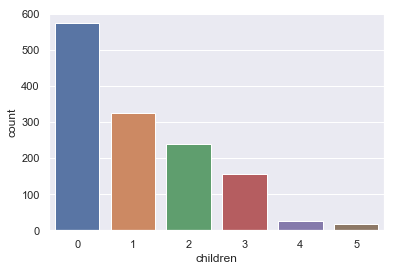

In [42]:
sns.countplot(data['children']);

In [43]:
print("people are higher with no child and are very less for more than 4 children.")

people are higher with no child and are very less for more than 4 children.


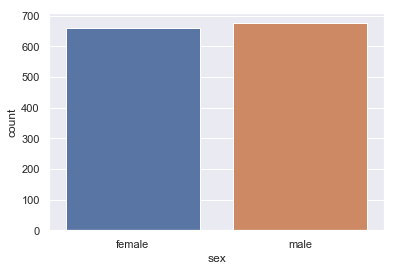

In [44]:
sns.countplot(data['sex']);

In [45]:
print("gender is not significant")

gender is not significant


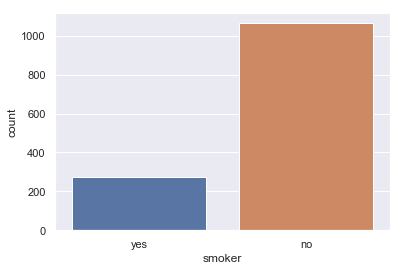

In [46]:
sns.countplot(data['smoker']);

In [47]:
print("Non-smoker are higher than smoker")

Non-smoker are higher than smoker


### Pair plot that includes all the columns of the data frame

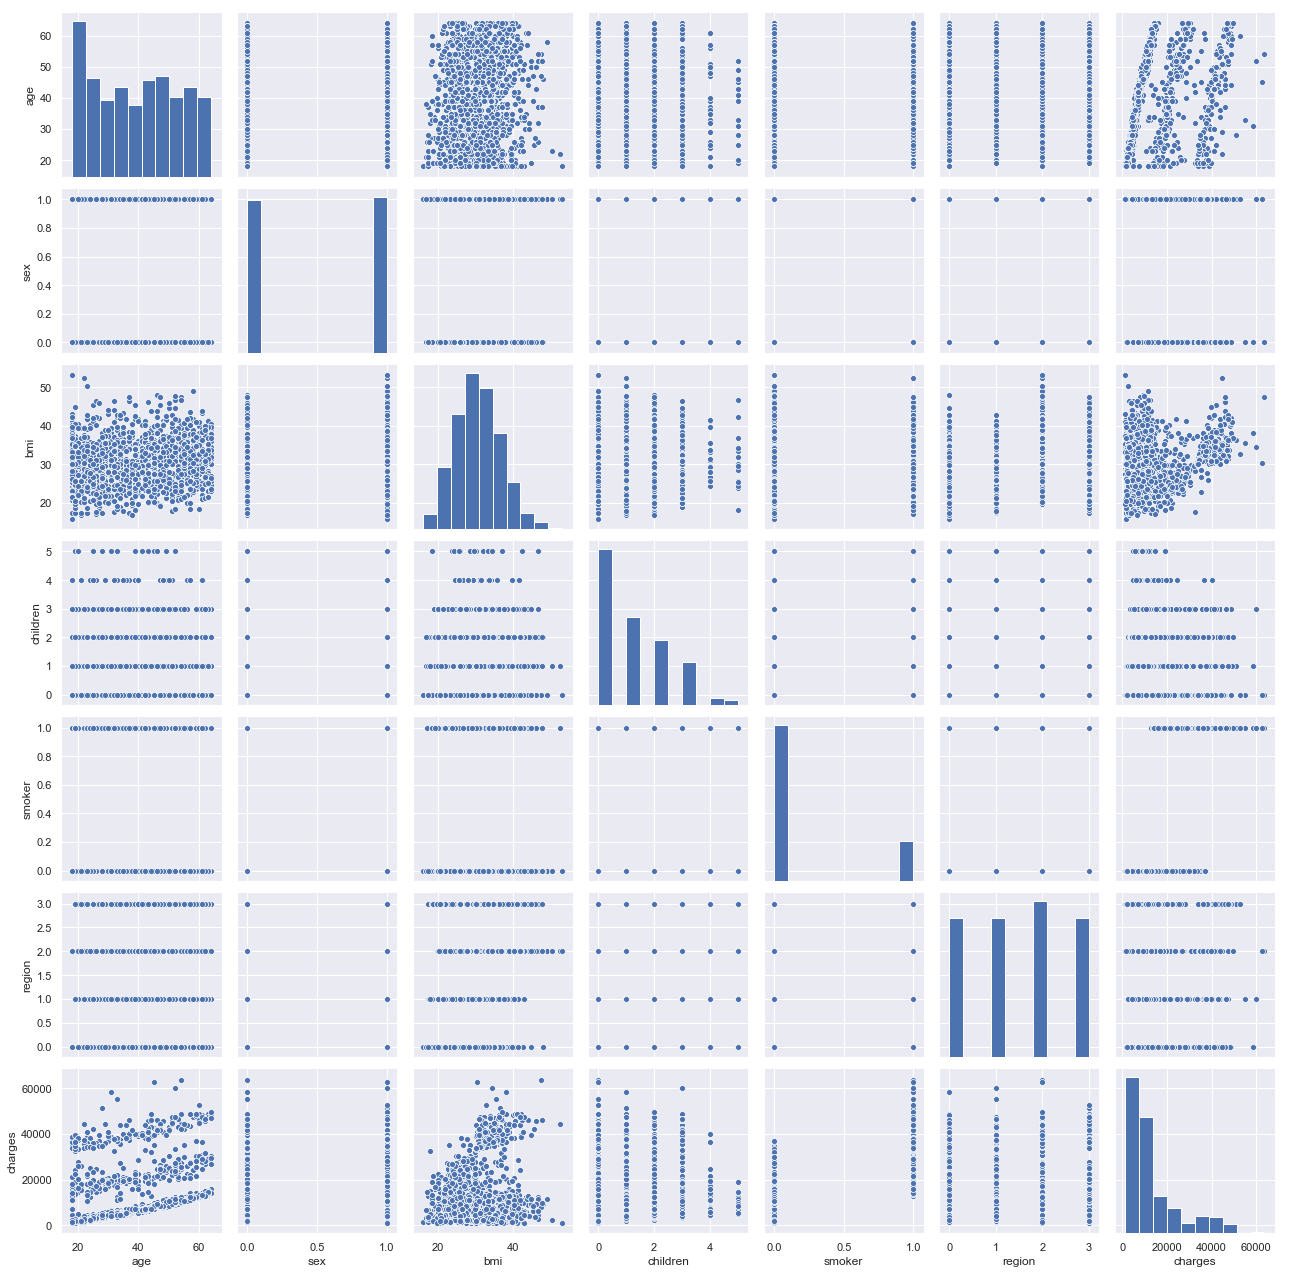

In [49]:
data1 = copy.deepcopy(data)
data1.loc[:,['sex', 'smoker', 'region']] = data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(data1) ;

In [50]:
print(" from pairplot, its has inferenced that 'charges vs age' and 'charge vs smoker' have relation")
print("charge vs smoker, shows smokers spends more money than non smoker")
print("charge vs age, shows for high age health insurance charges are more")

 from pairplot, its has inferenced that 'charges vs age' and 'charge vs smoker' have relation
charge vs smoker, shows smokers spends more money than non smoker
charge vs age, shows for high age health insurance charges are more


### Do charges of people who smoke differ significantly from the people who don't?

In [52]:
#Do charges of people who smoke differ significantly from the people who don't?
#smokers vs non-smokers info
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

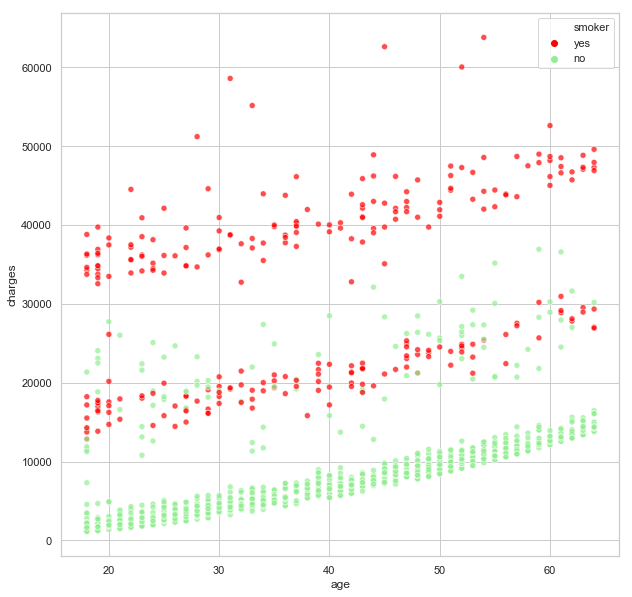

In [81]:
# Visualisation through Scatter plot to check dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['red','lightgreen'] ,alpha=0.7);

In [64]:
print("Through scatterplot it is clear that smokers differ from the non-smokers.")

Through scatterplot it is clear that smokers differ from the non-smokers.


In [65]:
#check with t-test to determine the impact of smoking on the charges.
H0 = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

s = np.array(data[data.smoker == 'yes'].charges) 
ns = np.array(data[data.smoker == 'no'].charges)

#t-test
t_stat, p_value  = stats.ttest_ind(s,ns, axis = 0)
t_stat, p_value 


(46.664921172723716, 8.271435842177219e-283)

In [66]:
print("p_value = ", p_value)

p_value =  8.271435842177219e-283


In [67]:
print("p_value is lesser than 0.05.")
print("Rejecting Null Hypothesis")
print("charges by smokers and non-smokers is significantly different. Smokers pay higher charges in comparison to the non-smokers.")

p_value is lesser than 0.05.
Rejecting Null Hypothesis
charges by smokers and non-smokers is significantly different. Smokers pay higher charges in comparison to the non-smokers.


### Does bmi of males differ significantly from that of females?

In [68]:
#Does bmi of males differ significantly from that of females?
# male female info
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

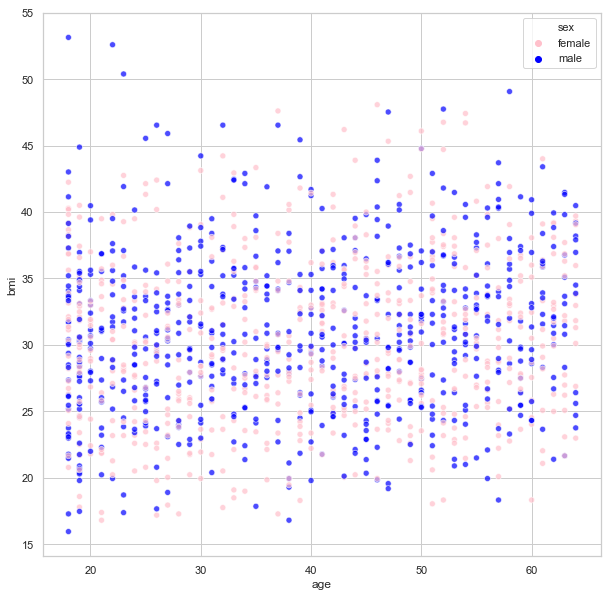

In [95]:
# Visualisation through Scatter plot to check dependency between age of male, female and bmi
plt.figure(figsize=(10,10))
sns.scatterplot(data.age, data.bmi,hue=data.sex, palette= ['pink','blue'] ,alpha=0.7  );

In [84]:
print("vizualisation doesnt show clearly any relation between age and bmi.")

vizualisation doesnt show clearly any relation between age and bmi.


In [85]:
#check with t-test dependency of bmi on gender
H0 = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(data[data.sex == 'male'].bmi)  
y = np.array(data[data.sex == 'female'].bmi) 

t_stats_bmi, p_value_bmi  = stats.ttest_ind(x,y, axis = 0)  
t_stats_bmi, p_value_bmi


(1.696752635752224, 0.08997637178984932)

In [86]:
print("p_value = ", p_value_bmi)

p_value =  0.08997637178984932


In [87]:
print("p_value is greater than 0.05.")
print("Fail to Reject Null Hypothesis")
print("Gender has no impact on bmi.")

p_value is greater than 0.05.
Fail to Reject Null Hypothesis
Gender has no impact on bmi.


### Is the proportion of smokers significantly different in different genders?

In [88]:
#Is the proportion of smokers significantly different in different genders?
# to check the proportion of smoker wrt gender Chi_square test should be performed
H0 = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(data['sex'],data['smoker']) 
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [89]:
chi_stats, p_value_chi, dof, expected =  stats.chi2_contingency(crosstab)
chi_stats, p_value_chi, dof, expected 

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [90]:
print("p_value = ", p_value_chi)

p_value =  0.006548143503580696


In [91]:
print("p_value is less than 0.05.")
print("Reject Null Hypothesis")
print("Gender has an effect on smoking habits, Smoking habits differs with the gender.")

p_value is less than 0.05.
Reject Null Hypothesis
Gender has an effect on smoking habits, Smoking habits differs with the gender.


### Is the distribution of bmi across women with no children, one child and two children, the same ?

In [92]:
#Is the distribution of bmi across women with no children, one child and two children, the same ?
# Using anova test to check the proportion distrbution of bmi for female
H0 = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

fdata = copy.deepcopy(data[data['sex'] == 'female'])

child_zero = fdata[fdata.children == 0]['bmi']
child_one = fdata[fdata.children == 1]['bmi']
child_two = fdata[fdata.children == 2]['bmi']

f_stat, p_value_annova = stats.f_oneway(child_zero,child_one,child_two)
f_stat, p_value_annova

(0.3344720147757968, 0.7158579926754841)

In [93]:
print("p_value = ", p_value_annova)

p_value =  0.7158579926754841


In [94]:
print("p_value is greater than 0.05.")
print("Fail to Reject Null Hypothesis")
print("number of children do not have any effect on female bmi.")

p_value is greater than 0.05.
Fail to Reject Null Hypothesis
number of children do not have any effect on female bmi.


###   THE  END 